In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

In [389]:
dataset = pd.read_csv("spam.csv", encoding="latin-1")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [390]:

dataset.drop(columns=["Unnamed: 2" ,"Unnamed: 3" , "Unnamed: 4"],inplace=True)
dataset.head()
dataset.rename(columns={'v1':'target' , 'v2' : 'text'},inplace=True)
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [391]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [392]:
dataset['target']=encoder.fit_transform(dataset['target'])
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [393]:
dataset=dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

np.int64(0)

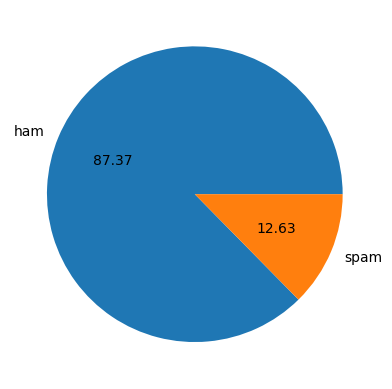

In [394]:
plt.pie(dataset['target'].value_counts() , labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [395]:
dataset['num_char']=dataset['text'].apply(len)
dataset.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [396]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [397]:
dataset['word count'] = dataset['text'].apply(
    lambda x: len(nltk.word_tokenize(x))
)
dataset.head()


,target,text,num_char,word count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [398]:
dataset['num_sent'] = dataset['text'].apply(
    lambda x: len(nltk.sent_tokenize(x))
)
dataset.head()

,target,text,num_char,word count,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_char', ylabel='Count'>

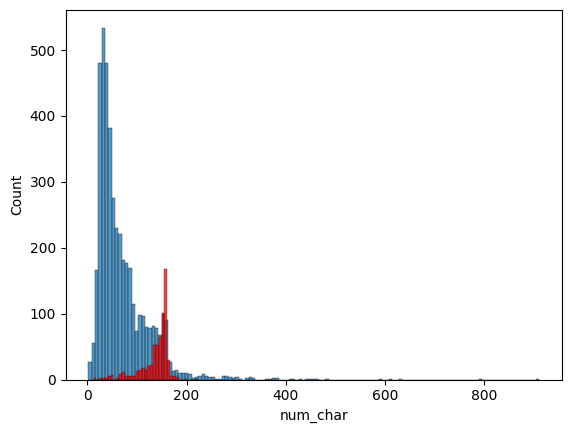

In [399]:
sns.histplot(dataset[dataset['target']==0]['num_char'])
sns.histplot(dataset[dataset['target']==1]['num_char'],color='red')

<Axes: xlabel='word count', ylabel='Count'>

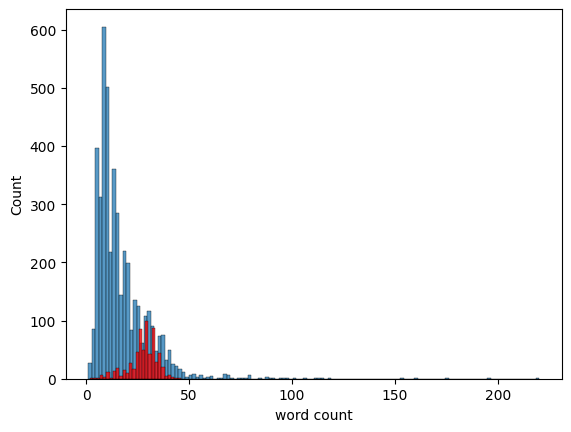

In [400]:
sns.histplot(dataset[dataset['target']==0]['word count'])
sns.histplot(dataset[dataset['target']==1]['word count'],color='red')

Data Preprosessing
1.lower case
2.Tokenization
3.Removing space char
4.removing stop word and punctuation
5.streming

In [401]:
from nltk.corpus import stopwords 
import string

In [402]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [403]:
def text_processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:

            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
   
    return " ".join(y)

In [404]:
text_processing("i loved macone learnig movies to wath you")

'love macon learnig movi wath'

In [405]:
dataset['text_processing'] = dataset['text'].apply(text_processing)
dataset.head()

,target,text,num_char,word count,num_sent,text_processing
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [406]:
from wordcloud import WordCloud
wc = WordCloud(height=500 , width=500  , min_font_size=10 , background_color='white')

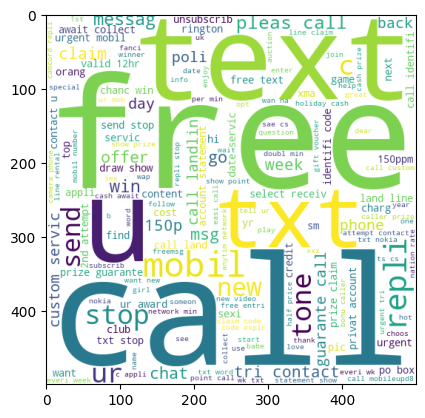

In [407]:
spam_wc = wc.generate(dataset[dataset['target']==1 ]['text_processing'].str.cat(sep=" "))
plt.imshow(spam_wc)

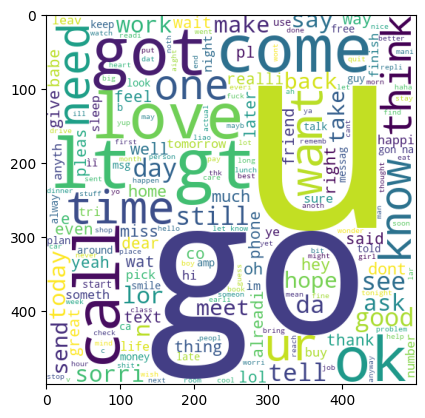

In [408]:
spam_wc = wc.generate(dataset[dataset['target']==0]['text_processing'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [409]:
spam_corpus=[]
for msg in dataset[dataset['target']== 1]['text_processing'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [410]:
len(spam_corpus)

9939

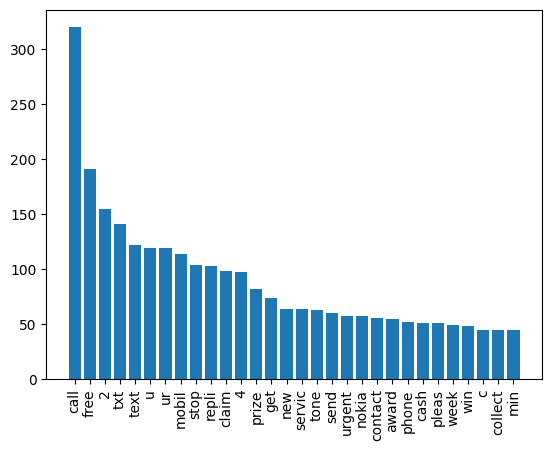

In [411]:
from collections import Counter

spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

plt.bar(spam_df['word'], spam_df['count'])
plt.xticks(rotation=90)
plt.show()


In [412]:
ham_corpus=[]
for msg in dataset[dataset['target']== 0]['text_processing'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

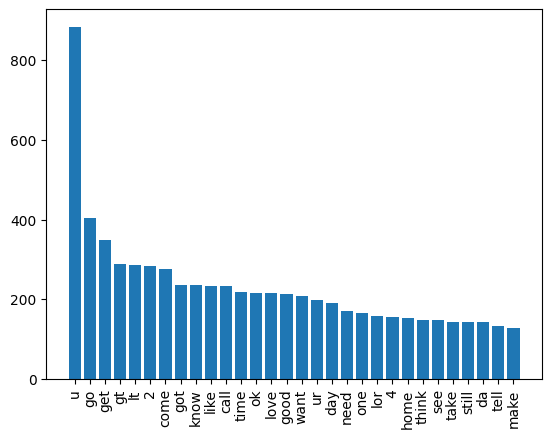

In [413]:
from collections import Counter

ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=['word', 'count']
)

plt.bar(ham_df['word'], ham_df['count'])
plt.xticks(rotation=90)
plt.show()


Model Building

In [414]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [415]:
x = tfidf.fit_transform(dataset['text_processing']).toarray()
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [416]:
y = dataset['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [417]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y ,random_state=2, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [419]:
gb.fit(x_train , y_train)
y_pred_1= gb.predict(x_test)
print(accuracy_score(y_test ,y_pred_1))
print(confusion_matrix(y_test ,y_pred_1))
print(precision_score(y_test ,y_pred_1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [420]:
mb.fit(x_train , y_train)
y_pred_2= mb.predict(x_test)
print(accuracy_score(y_test ,y_pred_2))
print(confusion_matrix(y_test ,y_pred_2))
print(precision_score(y_test ,y_pred_2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [421]:
bb.fit(x_train , y_train)
y_pred_3= bb.predict(x_test)
print(accuracy_score(y_test ,y_pred_3))
print(confusion_matrix(y_test ,y_pred_3))
print(precision_score(y_test ,y_pred_3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [422]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mb, open('model.pkl', 'wb'))
